In [1]:
import sys
sys.path.append('../code/')
from kernel import *
import matplotlib.pyplot as plt
import numpy as np

# FFT

In [2]:
C = Kernel()

In [3]:
def f(x):
    return np.exp(-x*x)

In [4]:
N = 9
x = 2.0*np.pi*np.arange(N)/N
print(x)

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361]


In [5]:
y = f(x)

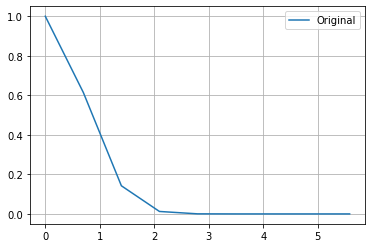

In [6]:
plt.plot(x, y, label='Original')
plt.legend()
plt.grid()
plt.show()

In [7]:
y = y[np.newaxis, np.newaxis, np.newaxis, :]

In [8]:
C.calc(y)

(1, 1, 1, 9)


In [9]:
print(C.C)

[[[[1.00000000e+00 6.14228745e-01 1.42337898e-01 1.24443217e-02
    4.10470725e-04 5.10802977e-06 2.39819738e-08 4.24792365e-11
    2.83876051e-14]]]]


In [10]:
yt = C.fft()

In [11]:
def fit_fun(yt, x):
    res = 0.0
    for n in range(len(yt)):
        res += yt[n]*np.exp(1j*n*x)
    return res

In [12]:
xx = np.linspace(0.0, 2.0*np.pi, 100)
yy = f(xx)
yfit =  fit_fun(yt[0, 0, 0], xx)

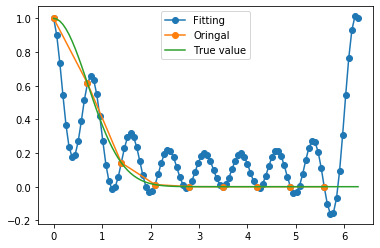

In [13]:
plt.plot(xx, yfit.real, label='Fitting', marker='o')
plt.plot(x, fit_fun(yt[0, 0, 0], x).real, label='Oringal', marker='o')
plt.plot(xx, yy.real, label='True value')
plt.legend()
plt.show()

<font color=red>Therefore, it is not good to interploate the result. Luckly, we do not need the interpolation.</font>